In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.datasets import  load_iris

from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras import utils
from sklearn.model_selection import train_test_split

In [2]:
dataset = datasets.load_iris()
#dataset

In [3]:
X = dataset.data
Y = dataset.target
Y = Y.reshape(len(Y), 1)
print(X.shape)
print(Y.shape)
#print(X)
#print(Y)

(150, 4)
(150, 1)


In [4]:
Matrix = np.append(X, Y, axis=1)
print(Matrix[0])

[5.1 3.5 1.4 0.2 0. ]


In [5]:
np.random.shuffle(Matrix)
print(Matrix[0])

[6.7 2.5 5.8 1.8 2. ]


In [6]:
x_train = Matrix[:120,:4]
y_train = Matrix[:120,4]
x_test = Matrix[120:,:4]
y_test = Matrix[120:,4]

In [7]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units = 8, activation='linear' ,input_shape=(4,)),
                             keras.layers.Dense(units = 8, activation = 'linear'),
                             keras.layers.Dense(units = 3, activation = 'softmax')
])

In [8]:
opti = tf.keras.optimizers.Adam(learning_rate=0.01)

In [9]:
model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics = ['accuracy'], )

In [ ]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 5ms/step - loss: 1.2686 - accuracy: 0.5500
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.8742 - accuracy: 0.4167
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.7741 - accuracy: 0.4417
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.5038 - accuracy: 0.8583
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.5274 - accuracy: 0.6583
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4838 - accuracy: 0.7667
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.9583
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.9667
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3608 - accuracy: 0.9583
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.9417
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 0.1663 - accuracy: 0.9667


[0.16629740595817566, 0.9666666388511658]

In [ ]:
y_hats = model.predict(x_test) 

In [ ]:
y_hats

array([[9.91758883e-01, 8.24083667e-03, 1.82301136e-07],
       [3.50460177e-03, 7.02632010e-01, 2.93863446e-01],
       [9.72068608e-01, 2.79258639e-02, 5.53939526e-06],
       [1.29595549e-06, 2.92421710e-02, 9.70756531e-01],
       [5.92697825e-06, 5.46517819e-02, 9.45342243e-01],
       [3.45507200e-04, 3.11381638e-01, 6.88272893e-01],
       [9.76034760e-01, 2.39622369e-02, 2.99002295e-06],
       [7.99083151e-03, 8.51069152e-01, 1.40940025e-01],
       [7.28659870e-05, 2.17875198e-01, 7.82051921e-01],
       [1.05036554e-04, 2.30276659e-01, 7.69618332e-01],
       [9.86106634e-01, 1.38922939e-02, 1.00287889e-06],
       [8.73107056e-05, 2.04709023e-01, 7.95203626e-01],
       [9.84441698e-01, 1.55570675e-02, 1.12184387e-06],
       [1.34522538e-03, 5.55944502e-01, 4.42710280e-01],
       [1.27159922e-07, 8.01597815e-03, 9.91983950e-01],
       [3.04340138e-05, 1.35363102e-01, 8.64606440e-01],
       [7.00242212e-03, 8.61515582e-01, 1.31481960e-01],
       [7.65357436e-06, 7.62889

In [ ]:
np.argmax(y_hats[0])

0

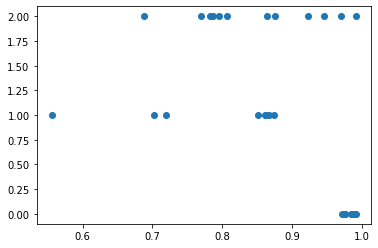

In [ ]:
values =[]
predictions =[]
for i in range(len(y_hats)):
  l = np.argmax(y_hats[i])
  values.append(l)
  predictions.append(y_hats[i][l])

plt.scatter( predictions, values)
# print(len(values))
# print(len(y_hats))

TESTING: sigmoid = 0.683 and 0.733
        relu  = 0.958 and 0.933